In [10]:
# Importing neccessary packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
#from imblearn.combine import SMOTEENN
from sklearn.feature_selection import SelectKBest
from collections import Counter
import seaborn as sns # visualization
import itertools
import io
import plotly.offline as py # visualization
py.init_notebook_mode(connected=True) # visualization
import plotly.graph_objs as go # visualization
from plotly.subplots import make_subplots
import plotly.figure_factory as ff # visualization
import warnings
warnings.filterwarnings("ignore")
import os
from plotly.subplots import make_subplots

In [11]:
data = pd.read_excel('customer_churn_large_dataset.xlsx')
data.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0


computing the total cost

In [12]:
data['total_cost'] = data['Monthly_Bill'] * data['Subscription_Length_Months']
data['total_cost']

0        1247.12
1          48.76
2         427.35
3         293.82
4        1104.66
          ...   
99995    1267.99
99996    1171.35
99997    1633.87
99998     985.00
99999    1454.83
Name: total_cost, Length: 100000, dtype: float64

In [13]:
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,total_cost
0,1.0,Customer_1,63.0,Male,Los Angeles,17.0,73.36,236.0,0.0,1247.12
1,2.0,Customer_2,62.0,Female,New York,1.0,48.76,172.0,0.0,48.76
2,3.0,Customer_3,24.0,Female,Los Angeles,5.0,85.47,460.0,0.0,427.35
3,4.0,Customer_4,36.0,Female,Miami,3.0,97.94,297.0,1.0,293.82
4,5.0,Customer_5,46.0,Female,Miami,19.0,58.14,266.0,0.0,1104.66
...,...,...,...,...,...,...,...,...,...,...
99995,99996.0,Customer_99996,33.0,Male,Houston,23.0,55.13,226.0,1.0,1267.99
99996,99997.0,Customer_99997,62.0,Female,New York,19.0,61.65,351.0,0.0,1171.35
99997,99998.0,Customer_99998,64.0,Male,Chicago,17.0,96.11,251.0,1.0,1633.87
99998,99999.0,Customer_99999,51.0,Female,New York,20.0,49.25,434.0,1.0,985.00


In [14]:
# Features types
data.dtypes

CustomerID                    float64
Name                           object
Age                           float64
Gender                         object
Location                       object
Subscription_Length_Months    float64
Monthly_Bill                  float64
Total_Usage_GB                float64
Churn                         float64
total_cost                    float64
dtype: object

In [15]:
data.shape

(100000, 10)

In [16]:
data.size

1000000

In [17]:
data.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,total_cost
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790,811.779157
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998,533.858809
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000,30.060000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000,378.240000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000,726.340000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000,1161.862500
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000,2399.520000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  float64
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  float64
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  float64
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  float64
 8   Churn                       100000 non-null  float64
 9   total_cost                  100000 non-null  float64
dtypes: float64(7), object(3)
memory usage: 7.6+ MB


In [19]:
data.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
total_cost                    0
dtype: int64

In [20]:
# numerical feature
numerical_feature = {feature for feature in data.columns if data[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

Count of Numerical feature: 7
Numerical feature are:
 {'Age', 'CustomerID', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB', 'Churn', 'total_cost'}


In [21]:
# Categorical feature
categorical_feature = {feature for feature in data.columns if data[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

Count of Categorical feature: 3
Categorical feature are:
 {'Location', 'Name', 'Gender'}


In [22]:
encoder = LabelEncoder()
for feature in categorical_feature:
    data[feature] = encoder.fit_transform(data[feature])

In [23]:
data

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,total_cost
0,1.0,0,63.0,1,2,17.0,73.36,236.0,0.0,1247.12
1,2.0,11112,62.0,0,4,1.0,48.76,172.0,0.0,48.76
2,3.0,22223,24.0,0,2,5.0,85.47,460.0,0.0,427.35
3,4.0,33334,36.0,0,3,3.0,97.94,297.0,1.0,293.82
4,5.0,44445,46.0,0,3,19.0,58.14,266.0,0.0,1104.66
...,...,...,...,...,...,...,...,...,...,...
99995,99996.0,99996,33.0,1,1,23.0,55.13,226.0,1.0,1267.99
99996,99997.0,99997,62.0,0,4,19.0,61.65,351.0,0.0,1171.35
99997,99998.0,99998,64.0,1,0,17.0,96.11,251.0,1.0,1633.87
99998,99999.0,99999,51.0,0,4,20.0,49.25,434.0,1.0,985.00


In [24]:
min(data['Location'])

0

In [ ]:
max(data['Location'])

<AxesSubplot:>

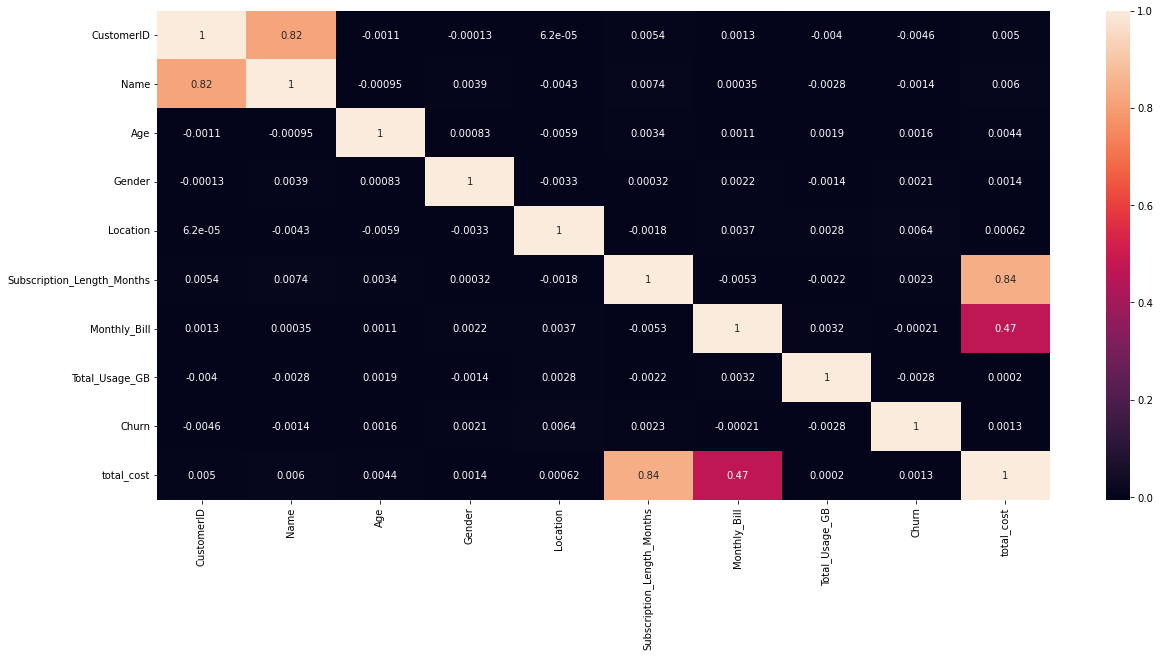

In [25]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(20, 9))
sns.heatmap(data.corr(), annot=True)

In [ ]:
#from heatmap we can consider the columns: Subscription_Length_Months,Age,Monthly Bill,Total_
# splitting dataset into dependent and independent feature
X = data.drop(['Churn','Name','CustomerID'], axis=1)
y = data['Churn']
X

In [27]:
# splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Choose an appropriate machine learning algorithm
model = RandomForestClassifier()

# Train and validate the model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")







Accuracy: 0.4991
Precision: 0.4929901653065495
Recall: 0.47673006879805746
F1 Score: 0.48472379384836956


In [30]:
# Define hyperparameter grid for RandomForest Classifier
param_grid = { 'n_estimators': [50, 100, 200], 
              'max_depth': [None, 5, 10], 
              'min_samples_split': [2, 5, 10] }

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
rf_classifier = RandomForestClassifier()

In [ ]:
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5)
grid_search.fit(X, y)

In [ ]:
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define model
rf = RandomForestClassifier()

# Define hyperparameter grid for RandomForest Classifier
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}

# Define cross-validation loops
outer_cv = KFold(n_splits=3, shuffle=True, random_state=0)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=0)

# Define inner CV for parameter search
model = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=inner_cv, n_jobs=-1
)

# Define outer CV for model selection and evaluation
scores = cross_val_score(model, X, y,
                        scoring='accuracy',
                        cv=outer_cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:

scaler.fit(data.drop(['Churn'],axis=1))
scaled_features=scaler.transform(data.drop('Churn',axis=1))

In [ ]:
from sklearn.model_selection import train_test_split
X=scaled_features
y=data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=44)

In [ ]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

In [ ]:
predR=log_model.predict(X_test)

In [ ]:
print(classification_report(y_test,predR,target_names=['Churn Yes','Churn NO']))

In [ ]:
# Define hyperparameter grid for RandomForest Classifier
param_grid = { 'n_estimators': [50, 100, 200], 
              'max_depth': [None, 5, 10], 
              'min_samples_split': [2, 5, 10] }

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf_classifier,
                           param_grid=param_grid,
                           cv=5)
# Fit the model
grid_search.fit(X, y)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

In [ ]:
confusion_matrix_LR=confusion_matrix(y_test,predR)

In [ ]:
plt.matshow(confusion_matrix(y_test,predR))
#add lables for x and y axis
plt.xlabel('Predicted class')
plt.xlabel('Actual class')
for i in range(2):
    for j in range(2):
        plt.text(j,i,confusion_matrix_LR[i,j],ha='center',va='center')
plt.xticks([0,1],["Not churned","churned"])
plt.yticks([0,1],["Not churned","churned"])
plt.show()

In [ ]:
log_model.score(X_train,y_train)

In [ ]:
accuracy_score(y_test,predR)

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc=dtc.predict(X_test)

In [ ]:
print(classification_report(y_test,predR))

In [ ]:
confusion_matrix_dtc=confusion_matrix(y_test,y_pred_dtc)

In [ ]:
plt.matshow(confusion_matrix_dtc)
#add lables for x and y axis
plt.xlabel('Predicted class')
plt.xlabel('Actual class')
for i in range(2):
    for j in range(2):
        plt.text(j,i,confusion_matrix_dtc[i,j],ha='center',va='center')
plt.xticks([0,1],["Not churned","churned"])
plt.yticks([0,1],["Not churned","churned"])
plt.show()

In [ ]:
dtc.score(X_train,y_train)

In [ ]:
accuracy_score(y_test,y_pred_dtc)

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
from imblearn.combine import SMOTEENN
st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

#EDA

In [ ]:
# plotting with target feature
sns.countplot(data=data, x='Churn')
plt.title('Count of Churn')
plt.show()

In [ ]:
l1 = data.loc[data['Churn']== 1].count()[0]
print(f"Pecentage of Left: {l1/len(data['Churn'])}")
print(data.Churn.value_counts())

In [ ]:
# Finding the correlation between the independent and dependent feature
plt.figure(figsize=(20, 9))
sns.heatmap(data.corr(), annot=True)

In [ ]:
# numerical feature
numerical_feature = {feature for feature in data.columns if data[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')

In [ ]:
# Categorical feature
categorical_feature = {feature for feature in data.columns if data[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')

In [ ]:
encoder = LabelEncoder()
for feature in categorical_feature:
    data[feature] = encoder.fit_transform(data[feature])

In [ ]:
data

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots:  'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=data['Gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=data['Churn'].value_counts(), name="Churn"),
              1, 2)

#  `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [ ]:
data["Churn"][data["Churn"]==0].groupby(by=data["Gender"]).count()

In [ ]:
data["Churn"][data["Churn"]==1].groupby(by=data["Gender"]).count()

In [ ]:
plt.figure(figsize=(1, 1))
labels =["Churn:1","Churn:0"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [24944,24835 , 25272,24949]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

In [ ]:
# pie chart for Count of Gender
ax = (data['Gender'].value_counts()*100.0 /len(data)).plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'],figsize =(5,5), fontsize = 12 )                                                                           
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Gender',fontsize = 12)
ax.set_title('% Gender', fontsize = 12)

In [ ]:
data['Gender'].replace(['Male', 'Female'],
                        [0, 1], inplace=True)
data['Gender']

In [ ]:
#from heatmap we can consider the columns: Subscription_Length_Months,Age,Monthly Bill,Total_
# splitting dataset into dependent and independent feature
X = data.drop(['Churn','Name','CustomerID','Total_Usage_GB'], axis=1)
y = data['Churn']
X


In [ ]:

y


In [ ]:
# splitting for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
# its an imbalance dataset
y.value_counts()

In [ ]:
Log_reg = LogisticRegression(C=150, max_iter=150)
Log_reg.fit(X_train, y_train)
log_pred = Log_reg.predict(X_test)

print(f'Accuracy score : {accuracy_score(log_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(log_pred, y_test)}')
print(f'Classification report :\n {classification_report(log_pred, y_test)}')

Random forest

In [ ]:
# Random forest classifier
Rfc = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=5)
Rfc.fit(X_train, y_train)
rfc_pred = Rfc.predict(X_test)

print(f'Accuracy score : {accuracy_score(rfc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(rfc_pred, y_test)}')
print(f'Classification report :\n {classification_report(rfc_pred, y_test)}')

In [ ]:
# decisionTree Classifier
Dtc = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
Dtc.fit(X_train, y_train)
dtc_pred = Dtc.predict(X_test)

print(f'Accuracy score : {accuracy_score(dtc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(dtc_pred, y_test)}')
print(f'Classification report :\n {classification_report(dtc_pred, y_test)}')

In [ ]:
from imblearn.combine import SMOTEENN
st=SMOTEENN()
X_train_st,y_train_st = st.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)